In [1]:
# Add preliminary required imports
from pykeen.datasets import Nations
from torch import optim
import networkx as nx
import matplotlib.pyplot as plt
from pykeen.triples import TriplesFactory

### Exploration phase

In [2]:
# Load the Nations dataset
dataset = Nations()
dataset.summarize()

Nations (create_inverse_triples=False)
Name          Entities    Relations    Triples
----------  ----------  -----------  ---------
Training            14           55       1592
Testing             14           41        201
Validation          14           45        199


In [3]:
# Extract all the triples from the dataset
training_triples = dataset.training.triples
validation_triples = dataset.validation.triples
test_triples = dataset.testing.triples
all_triples = list(training_triples) + list(validation_triples) + list(test_triples)

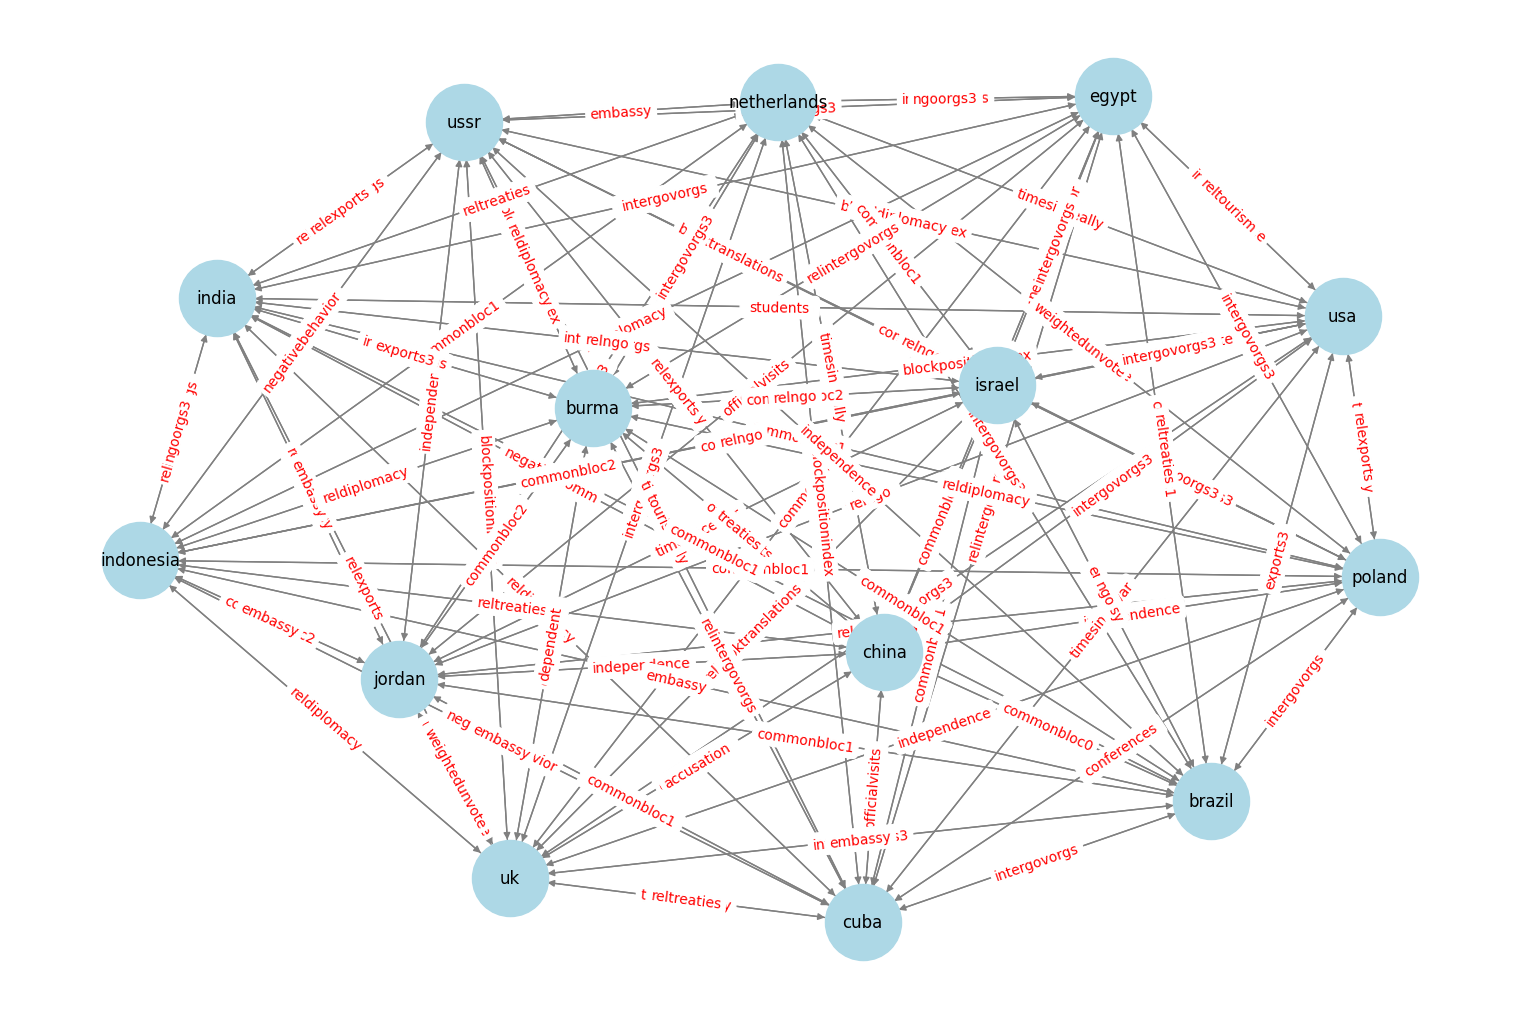

In [4]:
# Visualize the full KG

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph (each edge represents a triple)
for subj, pred, obj in all_triples:
    G.add_edge(subj, obj, label=pred)

# Position nodes using a layout algorithm (e.g., spring layout)
pos = nx.spring_layout(G, k=0.5, iterations=20)  # Adjusted layout parameters for larger graph

# Set the size of the Matplotlib figure
plt.figure(figsize=(15, 10))  # Width, Height in inches

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=12)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

# Show the plot
plt.show()

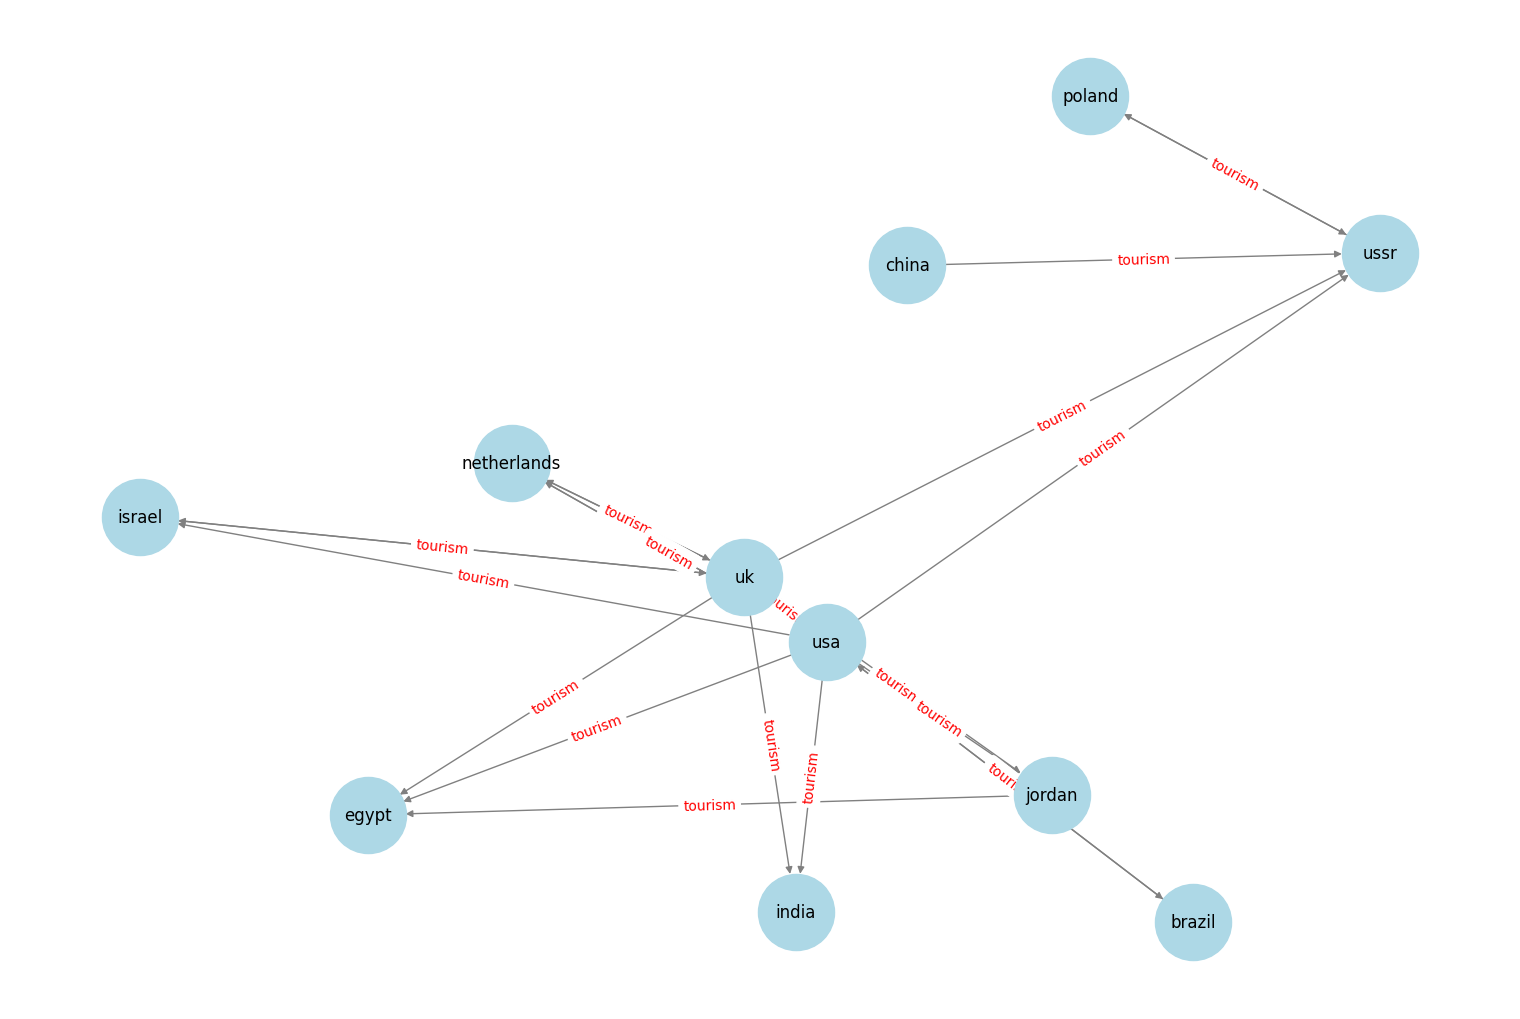

In [5]:
# Visualize the portion of the KG related to "tourism" relations

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph (only include "tourism" edges)
for subj, pred, obj in all_triples:
    if pred == 'tourism':
        G.add_edge(subj, obj, label=pred)

# Set a fixed seed for the layout to ensure reproducibility
seed = 42
pos = nx.spring_layout(G, k=0.5, iterations=20, seed=seed)

# Set the size of the Matplotlib figure
plt.figure(figsize=(15, 10))  # Width, Height in inches

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=12)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

# Show the plot
plt.show()

In [6]:
# Access the triples and preview a few of them
training_triples = dataset.training.mapped_triples
validation_triples = dataset.validation.mapped_triples
test_triples = dataset.testing.mapped_triples

print("Training Triples:\n", training_triples[:5])
print("Validation Triples:\n", validation_triples[:5])
print("Test Triples:\n", test_triples[:5])


# Access the 'tourism' triples and preview them
training_triples = dataset.training.triples
validation_triples = dataset.validation.triples
test_triples = dataset.testing.triples

print("\n\nTraining Triples with 'tourism' relationship:")
for triple in training_triples:
    if triple[1] == "tourism":
        print(triple)
print("\nValidation Triples with 'tourism' relationship:")
for triple in validation_triples:
    if triple[1] == "tourism":
        print(triple)
print("\nTest Triples with 'tourism' relationship:")
for triple in test_triples:
    if triple[1] == "tourism":
        print(triple)

Training Triples:
 tensor([[ 0,  3,  2],
        [ 0,  3,  3],
        [ 0,  3, 10],
        [ 0,  3, 13],
        [ 0,  4, 11]])
Validation Triples:
 tensor([[ 0,  7,  6],
        [ 0,  9, 10],
        [ 0,  9, 11],
        [ 0, 14,  6],
        [ 0, 19, 10]])
Test Triples:
 tensor([[ 0,  7,  5],
        [ 0, 14, 11],
        [ 0, 18, 12],
        [ 0, 20,  3],
        [ 0, 20, 10]])


Training Triples with 'tourism' relationship:
['poland' 'tourism' 'ussr']
['uk' 'tourism' 'israel']
['usa' 'tourism' 'netherlands']
['uk' 'tourism' 'ussr']
['jordan' 'tourism' 'egypt']
['ussr' 'tourism' 'poland']
['netherlands' 'tourism' 'uk']
['usa' 'tourism' 'ussr']
['uk' 'tourism' 'netherlands']
['china' 'tourism' 'ussr']
['israel' 'tourism' 'uk']
['uk' 'tourism' 'usa']
['usa' 'tourism' 'israel']
['uk' 'tourism' 'jordan']
['usa' 'tourism' 'india']
['uk' 'tourism' 'egypt']
['uk' 'tourism' 'india']
['brazil' 'tourism' 'usa']
['usa' 'tourism' 'brazil']
['usa' 'tourism' 'jordan']
['netherlands' 'tourism'

### Training phase

In [7]:
# Define the model - you can choose any other model from PyKeen
from pykeen.models import TransE
model = TransE(triples_factory=dataset.training)

No cuda devices were available. The model runs on CPU
No random seed is specified. This may lead to non-reproducible results.


In [8]:
# Pick the optimizer
optimizer=optim.Adam(params=model.get_grad_params())

In [9]:
# Pick a training approach,
#e.g., Stochastic Local Closed World Assumption (SLCWA), or Local Closed World Assumption (LCWA)
from pykeen.training import SLCWATrainingLoop

# Initialize the training loop with SLCWATrainingLoop
training_loop=SLCWATrainingLoop(model=model, optimizer=optimizer)

In [10]:
# Train the model, define epochs and batch size
training_loop.train(num_epochs=100, batch_size=64)

Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

[0.021954455342724097,
 0.020789300414485547,
 0.020840131382846353,
 0.019644142208087384,
 0.01931561978917625,
 0.01810139586128781,
 0.01773710387885271,
 0.01783725664244225,
 0.01793218875799946,
 0.0175483600802757,
 0.01665654415311526,
 0.016597773449205273,
 0.016294939246908505,
 0.01571454384818149,
 0.01551267710612647,
 0.0147949648487508,
 0.015421114375243834,
 0.016100257635116577,
 0.014706345359284674,
 0.01487699637760469,
 0.014917170245144235,
 0.014149642432454843,
 0.014499595229649664,
 0.014362242091540715,
 0.013276902462669353,
 0.012808843436253131,
 0.013872989495495456,
 0.013441756704644342,
 0.012505302851523585,
 0.013300250560494524,
 0.012839456748722786,
 0.012587256954243434,
 0.013316882465352965,
 0.012467402946110347,
 0.012683969309282063,
 0.012167404195172104,
 0.012729257382639688,
 0.013258490168569077,
 0.012248072005696033,
 0.012469345638200865,
 0.011930247459878874,
 0.011967913813926466,
 0.011890045998983047,
 0.011881621788494551,
 

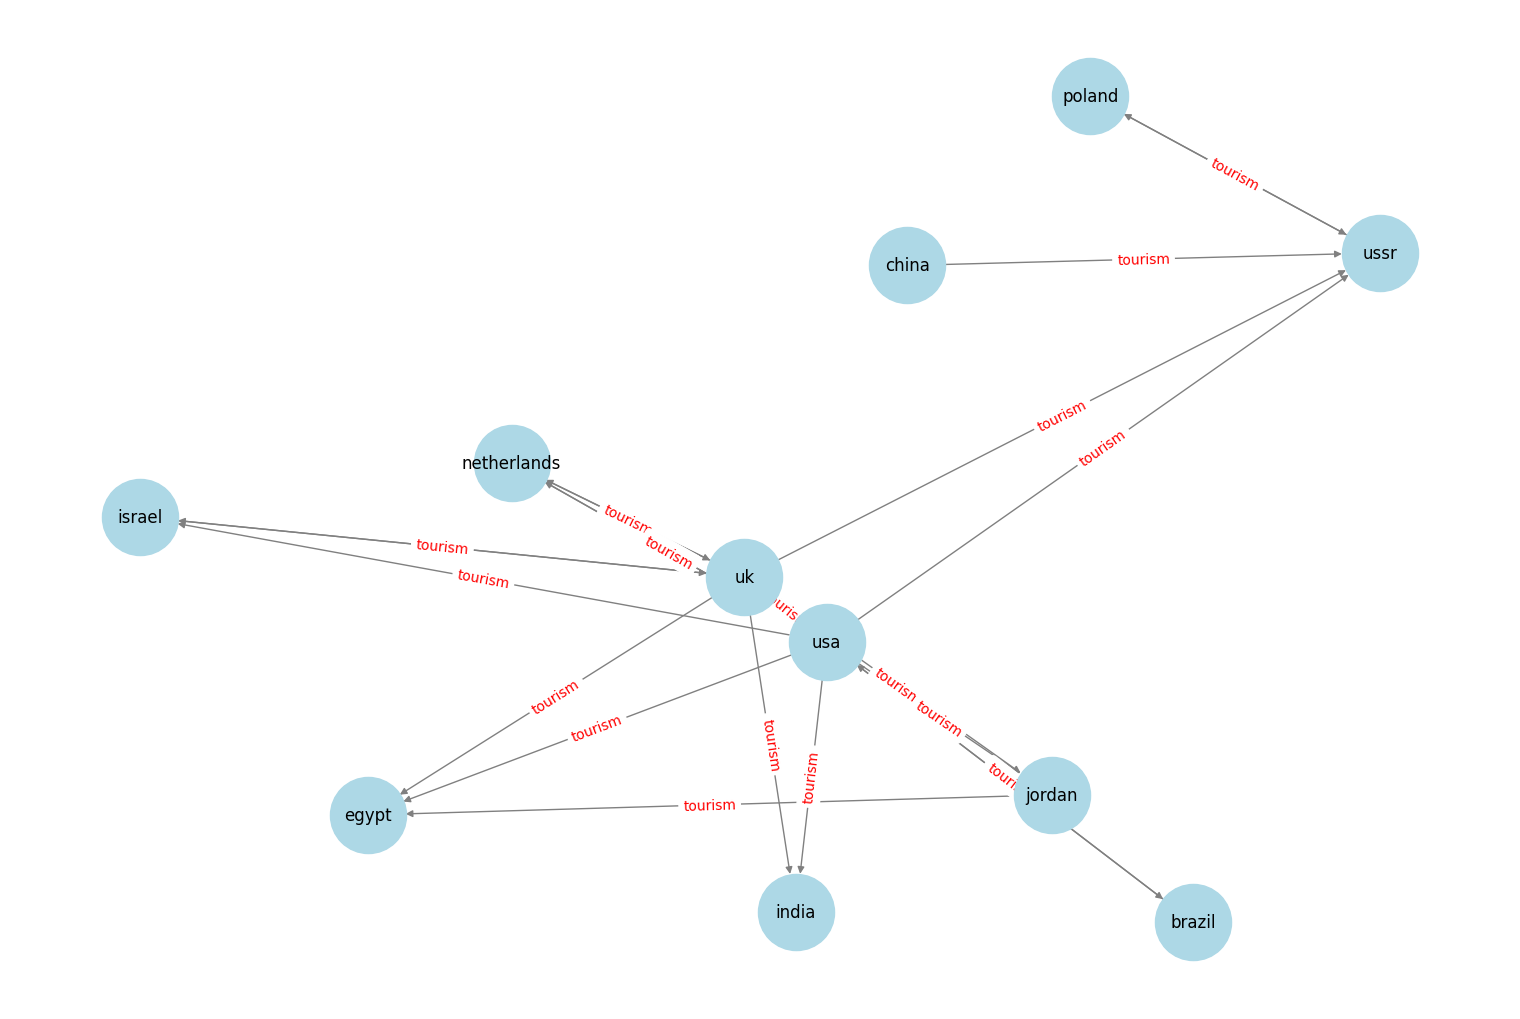

In [11]:
# Visualize the KG for "tourism" edges after training

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph (only include "tourism" edges)
for subj, pred, obj in all_triples:
    if pred == 'tourism':
        G.add_edge(subj, obj, label=pred)

# Set a fixed seed for the layout to ensure reproducibility
seed = 42
pos = nx.spring_layout(G, k=0.5, iterations=20, seed=seed)  # Fixed seed for reproducibility

# Set the size of the Matplotlib figure
plt.figure(figsize=(15, 10))  # Width, Height in inches

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=12)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

# Show the plot
plt.show()

### Evaluation phase

In [12]:
# Pick an evaluator
from pykeen.evaluation import RankBasedEvaluator
evaluator = RankBasedEvaluator()

In [13]:
# Evaluate on validation set during training
mapped_triples_validation = dataset.validation.mapped_triples
validation_results = evaluator.evaluate(model,
                                        mapped_triples_validation,
                                        batch_size=1024)

print("Validation Results:\n", validation_results)

Evaluating on cpu:   0%|          | 0.00/199 [00:00<?, ?triple/s]

Validation Results:
 RankBasedMetricResults(mean_rank={'head': {'avg': 3.7035175879396984, 'worst': 3.7035175879396984, 'best': 3.7035175879396984}, 'tail': {'avg': 3.819095477386935, 'worst': 3.819095477386935, 'best': 3.819095477386935}, 'both': {'avg': 3.7613065326633164, 'worst': 3.7613065326633164, 'best': 3.7613065326633164}}, mean_reciprocal_rank={'head': {'avg': 0.3622060519045444, 'worst': 0.3622060519045444, 'best': 0.3622060519045444}, 'tail': {'avg': 0.3674580723575699, 'worst': 0.3674580723575699, 'best': 0.3674580723575699}, 'both': {'avg': 0.3648320621310572, 'worst': 0.3648320621310572, 'best': 0.3648320621310572}}, hits_at_k={'head': {'avg': {1: 0.05025125628140704, 3: 0.5728643216080402, 5: 0.7939698492462312, 10: 0.9899497487437185}, 'worst': {1: 0.05025125628140704, 3: 0.5728643216080402, 5: 0.7939698492462312, 10: 0.9899497487437185}, 'best': {1: 0.05025125628140704, 3: 0.5728643216080402, 5: 0.7939698492462312, 10: 0.9899497487437185}}, 'tail': {'avg': {1: 0.06030

In [14]:
# Pick an evaluator
from pykeen.evaluation import RankBasedEvaluator
evaluator = RankBasedEvaluator()

# After training and validation evaluation, select the best model

# Now, evaluate the selected/best model on the test set
mapped_triples_test = dataset.testing.mapped_triples
test_results = evaluator.evaluate(model,
                                  mapped_triples_test,
                                  batch_size=1024)
print("Test Results:\n", test_results)

Evaluating on cpu:   0%|          | 0.00/201 [00:00<?, ?triple/s]

Test Results:
 RankBasedMetricResults(mean_rank={'head': {'avg': 4.024875621890548, 'worst': 4.024875621890548, 'best': 4.024875621890548}, 'tail': {'avg': 3.8208955223880596, 'worst': 3.8208955223880596, 'best': 3.8208955223880596}, 'both': {'avg': 3.9228855721393034, 'worst': 3.9228855721393034, 'best': 3.9228855721393034}}, mean_reciprocal_rank={'head': {'avg': 0.36186353723667153, 'worst': 0.36186353723667153, 'best': 0.36186353723667153}, 'tail': {'avg': 0.3667023827471589, 'worst': 0.3667023827471589, 'best': 0.3667023827471589}, 'both': {'avg': 0.36428295999191523, 'worst': 0.36428295999191523, 'best': 0.36428295999191523}}, hits_at_k={'head': {'avg': {1: 0.06467661691542288, 3: 0.5572139303482587, 5: 0.7611940298507462, 10: 0.9651741293532339}, 'worst': {1: 0.06467661691542288, 3: 0.5572139303482587, 5: 0.7611940298507462, 10: 0.9651741293532339}, 'best': {1: 0.06467661691542288, 3: 0.5572139303482587, 5: 0.7611940298507462, 10: 0.9651741293532339}}, 'tail': {'avg': {1: 0.06965

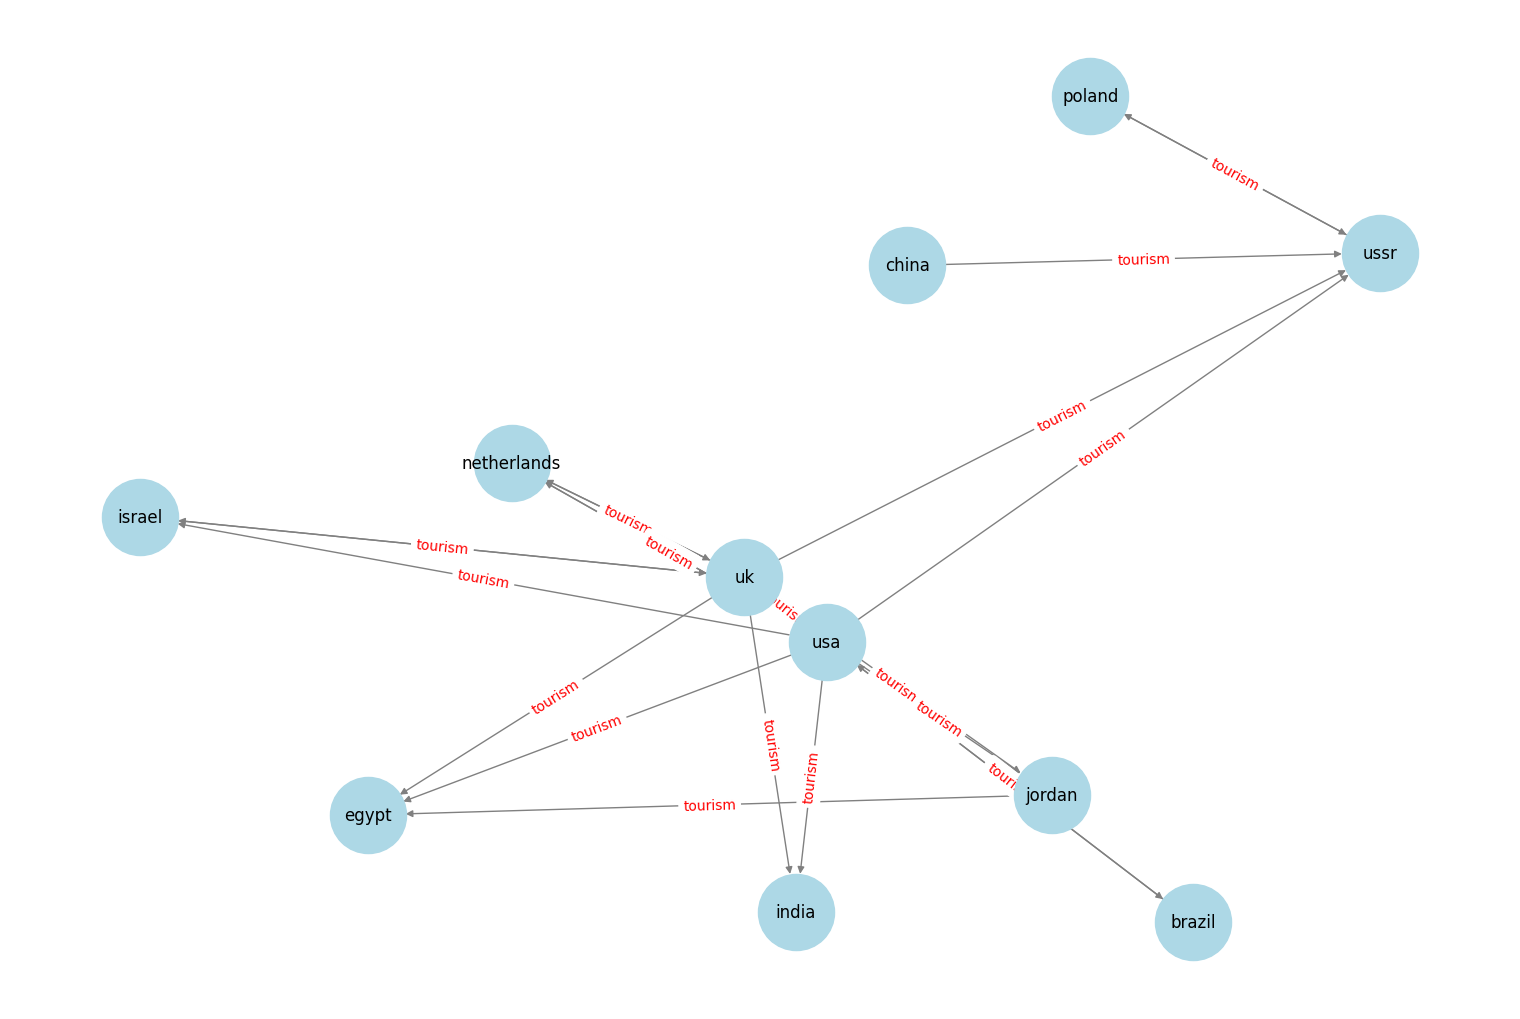

In [15]:
# Visualize the KG for "tourism" edges after evaluation

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph (only include "tourism" edges)
for subj, pred, obj in all_triples:
    if pred == 'tourism':
        G.add_edge(subj, obj, label=pred)

# Set a fixed seed for the layout to ensure reproducibility
seed = 42
pos = nx.spring_layout(G, k=0.5, iterations=20, seed=seed)  # Fixed seed for reproducibility

# Set the size of the Matplotlib figure
plt.figure(figsize=(15, 10))  # Width, Height in inches

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=12)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

# Show the plot
plt.show()

### Prediction phase

In [16]:
# Make new predictions for "tourism"
predicted_tails_india = model.predict_tails('india', 'tourism')
predicted_tails_india

,tail_id,tail_label,score,in_training
5,5,india,-7.479638,False
11,11,uk,-9.407210,False
4,4,egypt,-9.432693,False
8,8,jordan,-9.508847,False
12,12,usa,-9.548741,False
9,9,netherlands,-9.761677,False
7,7,israel,-9.920892,False
13,13,ussr,-9.997393,False
2,2,china,-10.413482,False
10,10,poland,-10.471050,False


In [17]:
# Make new predictions for "tourism"
predicted_tails_usa = model.predict_tails('usa', 'tourism')
predicted_tails_usa

,tail_id,tail_label,score,in_training
5,5,india,-6.857971,True
12,12,usa,-7.479638,False
11,11,uk,-7.587790,False
8,8,jordan,-7.757975,True
9,9,netherlands,-7.790063,True
13,13,ussr,-7.797885,True
7,7,israel,-8.162485,True
4,4,egypt,-8.310183,False
10,10,poland,-8.598215,False
0,0,brazil,-8.771414,True


In [18]:
# Make new predictions for "tourism"
predicted_tails_netherlands = model.predict_tails('netherlands', 'tourism')
predicted_tails_netherlands

,tail_id,tail_label,score,in_training
9,9,netherlands,-7.479638,False
11,11,uk,-7.891069,True
12,12,usa,-8.152628,True
5,5,india,-8.154507,False
10,10,poland,-8.661341,False
4,4,egypt,-8.768310,False
13,13,ussr,-8.872609,False
7,7,israel,-9.024718,False
8,8,jordan,-9.059518,False
0,0,brazil,-9.249071,False


In [ ]:
# Extract the new predicted triples (head, relation, tail) that are not in the training set
new_triples = []
new_triples += [('india', 'tourism', row['tail_label']) for _, row in predicted_tails_india.iterrows() if not row['in_training']]
new_triples += [('usa', 'tourism', row['tail_label']) for _, row in predicted_tails_usa.iterrows() if not row['in_training']]
new_triples += [('netherlands', 'tourism', row['tail_label']) for _, row in predicted_tails_netherlands.iterrows() if not row['in_training']]

# Visualize the KG for "tourism" edges after adding predictions

# Create a directed graph
G = nx.DiGraph()

# Add existing "tourism" edges to the graph
existing_edges = []
for subj, pred, obj in all_triples:
    if pred == 'tourism':
        G.add_edge(subj, obj, label=pred)
        existing_edges.append((subj, obj))

# Add new predicted edges to the graph only if they are not already present
new_edges = []
for subj, pred, obj in new_triples:
    if (subj, obj) not in existing_edges:
        G.add_edge(subj, obj, label=pred)
        new_edges.append((subj, obj))

# Set a fixed seed for the layout to ensure reproducibility
seed = 42
pos = nx.spring_layout(G, k=0.5, iterations=20, seed=seed)  # Fixed seed for reproducibility

# Set the size of the Matplotlib figure
plt.figure(figsize=(15, 10))  # Width, Height in inches

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=12)

# Draw existing edge labels
existing_edge_labels = {edge: 'tourism' for edge in existing_edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=existing_edge_labels, font_color='red', font_size=10)

# Draw new edge labels with a different color
new_edge_labels = {edge: 'tourism' for edge in new_edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=new_edge_labels, font_color='blue', font_size=10)

# Show the plot
plt.show()

In [ ]:
# Define score threshold
score_threshold = -8.5

# Function to get filtered predictions based on score threshold
def get_filtered_predictions(model, entity, relation, score_threshold):
    predictions = model.predict_tails(entity, relation)
    filtered_predictions = predictions[predictions['score'] >= score_threshold]
    return filtered_predictions

# Get filtered predictions
predicted_tails_india_filtered = get_filtered_predictions(model, 'india', 'tourism', score_threshold)
predicted_tails_usa_filtered = get_filtered_predictions(model, 'usa', 'tourism', score_threshold)
predicted_tails_netherlands_filtered = get_filtered_predictions(model, 'netherlands', 'tourism', score_threshold)

print("Filtered tourism predictions for India:")
print(predicted_tails_india_filtered)
print("\nFiltered tourism predictions for USA:")
print(predicted_tails_usa_filtered)
print("\nFiltered tourism predictions for Netherlands:")
print(predicted_tails_netherlands_filtered)

In [ ]:
# Extract the new predicted filtered triples (head, relation, tail) that are not in the training set
new_triples = []
new_triples += [('india', 'tourism', row['tail_label']) for _, row in predicted_tails_india_filtered.iterrows() if not row['in_training']]
new_triples += [('usa', 'tourism', row['tail_label']) for _, row in predicted_tails_usa_filtered.iterrows() if not row['in_training']]
new_triples += [('netherlands', 'tourism', row['tail_label']) for _, row in predicted_tails_netherlands_filtered.iterrows() if not row['in_training']]

# Visualize the KG for "tourism" edges after adding predictions

# Create a directed graph
G = nx.DiGraph()

# Add existing "tourism" edges to the graph
existing_edges = []
for subj, pred, obj in all_triples:
    if pred == 'tourism':
        G.add_edge(subj, obj, label=pred)
        existing_edges.append((subj, obj))

# Add new predicted edges to the graph only if they are not already present
new_edges = []
for subj, pred, obj in new_triples:
    if (subj, obj) not in existing_edges:
        G.add_edge(subj, obj, label=pred)
        new_edges.append((subj, obj))

# Set a fixed seed for the layout to ensure reproducibility
seed = 42
pos = nx.spring_layout(G, k=0.5, iterations=20, seed=seed)  # Fixed seed for reproducibility

# Set the size of the Matplotlib figure
plt.figure(figsize=(15, 10))  # Width, Height in inches

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=12)

# Draw existing edge labels
existing_edge_labels = {edge: 'tourism' for edge in existing_edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=existing_edge_labels, font_color='red', font_size=10)

# Draw new edge labels with a different color
new_edge_labels = {edge: 'tourism' for edge in new_edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=new_edge_labels, font_color='blue', font_size=10)

# Show the plot
plt.show()